Model Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043


Confusion Matrix:
 [[7753  199]
 [ 729  362]]


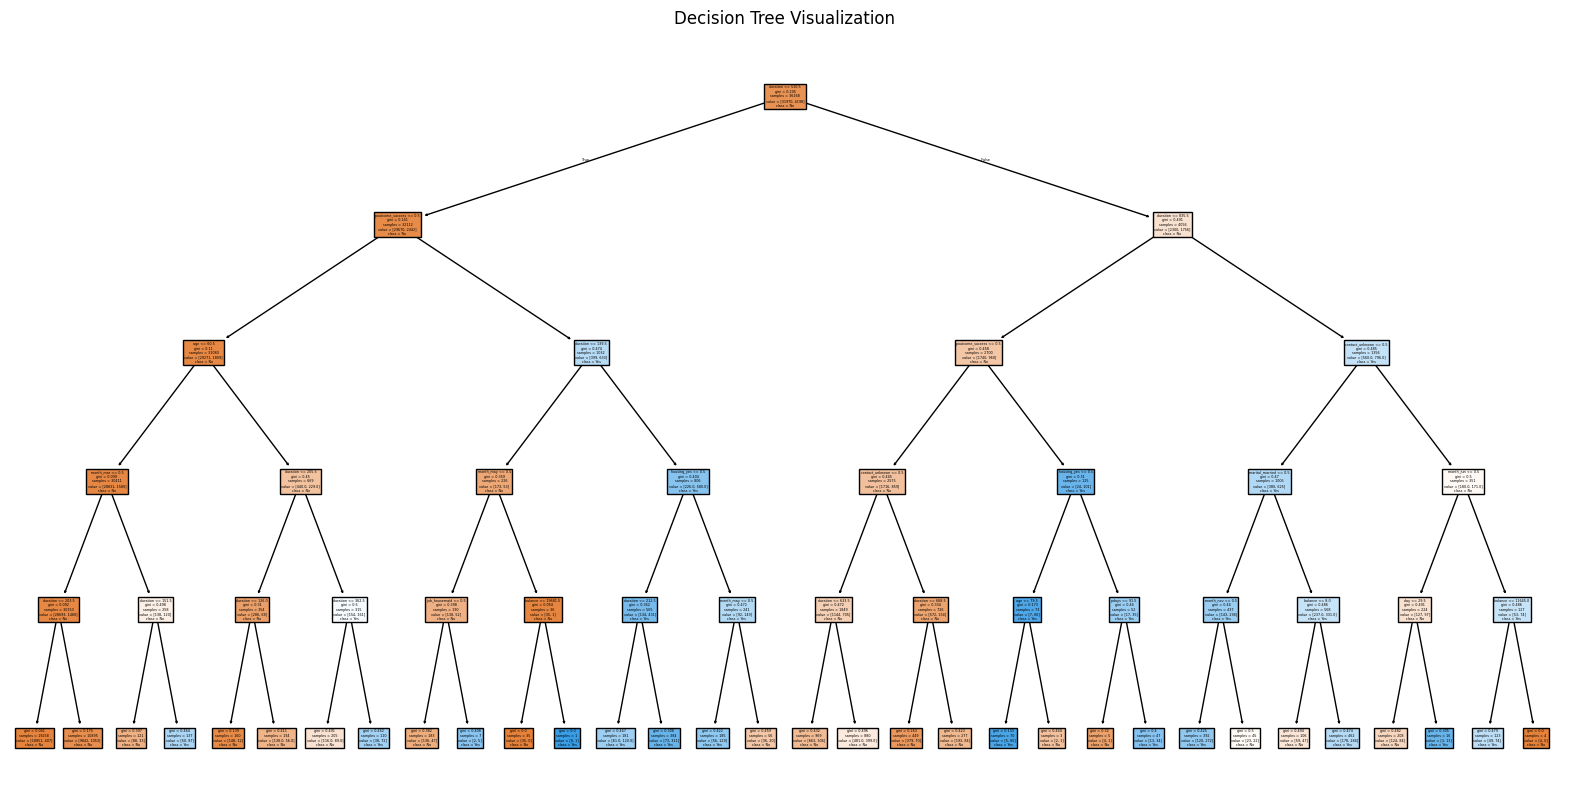

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
file_path = "bank-full.csv"
data = pd.read_csv(file_path, sep=";")

data['y'] = LabelEncoder().fit_transform(data['y'])

categorical_cols = [col for col in data.select_dtypes(include=['object']).columns if col != 'y']

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()
